## Imports

In [17]:
from __future__ import annotations

import matplotlib.pyplot as plt

# tensorflow imports
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

# sklearn helpers
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# check and setup GPU
physical_devices: list[tf.config.PhysicalDevice] = tf.config.experimental.list_physical_devices('GPU')
print(f'{len(physical_devices)} GPU(s) available:')
for i, device in enumerate(physical_devices):
    print(f'\t[{i}] {device.name}')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

1 GPU(s) available:
	[0] /physical_device:GPU:0


## Load Classification Data

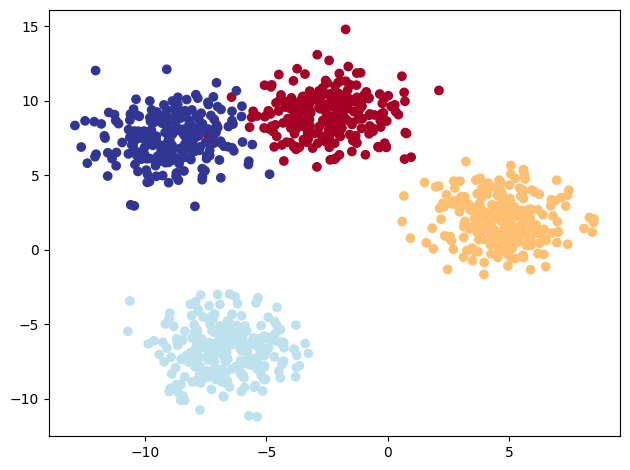

In [34]:
# create toy data
X, y = make_blobs(1000, 2, centers=4, cluster_std=1.5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# onehot encode targets
y_train = tf.one_hot(y_train, depth=4)
y_test = tf.one_hot(y_test, depth=4)

# visualize
plt.scatter(X[:,0], X[:,1], c=y, cmap='RdYlBu')
plt.tight_layout()

## Simple Sequential Model

In [60]:
BlobsModelV0 = Sequential([
    Dense(16, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])

BlobsModelV0.compile(optimizer=Adam(0.01), loss=categorical_crossentropy, metrics=['accuracy'])
BlobsModelV0.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
21/21 [==============================] - 1s 20ms/step - loss: 0.3347 - accuracy: 0.8761 - val_loss: 0.0333 - val_accuracy: 0.9909
Epoch 2/25
21/21 [==============================] - 0s 13ms/step - loss: 0.0352 - accuracy: 0.9910 - val_loss: 0.0215 - val_accuracy: 0.9909
Epoch 3/25
21/21 [==============================] - 0s 12ms/step - loss: 0.0468 - accuracy: 0.9836 - val_loss: 0.0474 - val_accuracy: 0.9818
Epoch 4/25
21/21 [==============================] - 0s 12ms/step - loss: 0.0535 - accuracy: 0.9866 - val_loss: 0.0181 - val_accuracy: 0.9909
Epoch 5/25
21/21 [==============================] - 0s 12ms/step - loss: 0.0255 - accuracy: 0.9910 - val_loss: 0.0240 - val_accuracy: 0.9939
Epoch 6/25
21/21 [==============================] - 0s 11ms/step - loss: 0.0283 - accuracy: 0.9896 - val_loss: 0.0341 - val_accuracy: 0.9879
Epoch 7/25
21/21 [==============================] - 0s 11ms/step - loss: 0.0356 - accuracy: 0.9881 - val_loss: 0.0429 - val_accuracy: 0.9818
Epoch 8/25
21

## Plot Decision Boundary

In [ ]:
def plot_boundary(X, y, model):

plot_boundary(X_train, y_train, BlobsModelV0)